In [2]:
# http://www.marketwatch.com/story/top-executives-are-buying-up-shares-of-these-eight-companies-2017-08-31?link=sfmw_fb
# Building and optimizing a portfolio based off above article
import numpy as np
import pandas as pd
#from pandas_datareader.data import DataReader
import pandas_datareader.data as pdr
import fix_yahoo_finance
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import quandl
quandl.ApiConfig.api_key = 'JgrixskwB3MtGDkJtxms'
%matplotlib inline

In [3]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-08-01')

In [58]:
# Unable to get KITE data
# Twinkie data only starts at 2015
#kite = quandl.get('WIKI/KITE.11',start_date=start,end_date=end)
#twnk = quandl.get('WIKI/TWNK.11',start_date=start,end_date=end)
#hri = quandl.get('WIKI/HRI.11',start_date=start,end_date=end)
#kite = pdr.DataReader('KITE', 'yahoo', start, end)
#kite.head()
#hri = pdr.DataReader('HRI', 'yahoo', start, end)

In [4]:
# Adj. Close
gild = quandl.get('WIKI/GILD.11',start_date=start,end_date=end)
sbux = quandl.get('WIKI/SBUX.11',start_date=start,end_date=end)
m = quandl.get('WIKI/M.11',start_date=start,end_date=end)
dis = quandl.get('WIKI/DIS.11',start_date=start,end_date=end)
bmy = quandl.get('WIKI/BMY.11',start_date=start,end_date=end)
luv = quandl.get('WIKI/LUV.11',start_date=start,end_date=end)
save = quandl.get('WIKI/SAVE.11',start_date=start,end_date=end)
pra = quandl.get('WIKI/PRA.11',start_date=start,end_date=end)

In [106]:
#pdr.DataReader('KITE', 'yahoo', start, end)
#twnk = pdr.get_data_yahoo('TWNK', start=start, end=end)['Adj Close'].to_frame()
#hri = pdr.get_data_yahoo('HRI', start=start, end=end)['Adj Close'].to_frame()

[*********************100%***********************]  1 of 1 downloaded

In [5]:
# Concatenate all the stocks into one dataframe of adjusted close values
stocks = pd.concat([gild, sbux, m, dis, bmy, luv, save, pra], axis=1)
stocks.columns = ['GILD','SBUX','M','DIS', 'BMY','LUV','SAVE','PRA']

In [6]:
stocks.head()

,GILD,SBUX,M,DIS,BMY,LUV,SAVE,PRA
Date,,,,,,,,
2012-01-03,19.907174,20.825138,27.950993,35.569102,29.525776,8.064574,15.07,28.179256
2012-01-04,19.983264,21.232121,27.925334,36.070468,29.247469,8.246770,14.62,27.973101
2012-01-05,20.221047,21.319496,29.011557,36.673963,29.094163,8.265948,14.46,28.072624
2012-01-06,20.344694,21.485049,29.558945,37.054630,29.145265,8.170056,14.58,27.990873
2012-01-09,20.320916,21.425266,29.473415,36.906077,28.881237,8.237181,14.93,27.983764


In [7]:
# Get the logrithmic return
# https://en.wikipedia.org/wiki/Rate_of_return
log_ret = np.log(stocks/stocks.shift(1))

In [8]:
log_ret.head()

,GILD,SBUX,M,DIS,BMY,LUV,SAVE,PRA
Date,,,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,0.003815,0.019354,-0.000918,0.013997,-0.009471,0.022341,-0.030316,-0.007343
2012-01-05,0.011829,0.004107,0.038160,0.016593,-0.005255,0.002323,-0.011004,0.003552
2012-01-06,0.006096,0.007735,0.018692,0.010326,0.001755,-0.011669,0.008265,-0.002916
2012-01-09,-0.001169,-0.002786,-0.002898,-0.004017,-0.009100,0.008182,0.023722,-0.000254


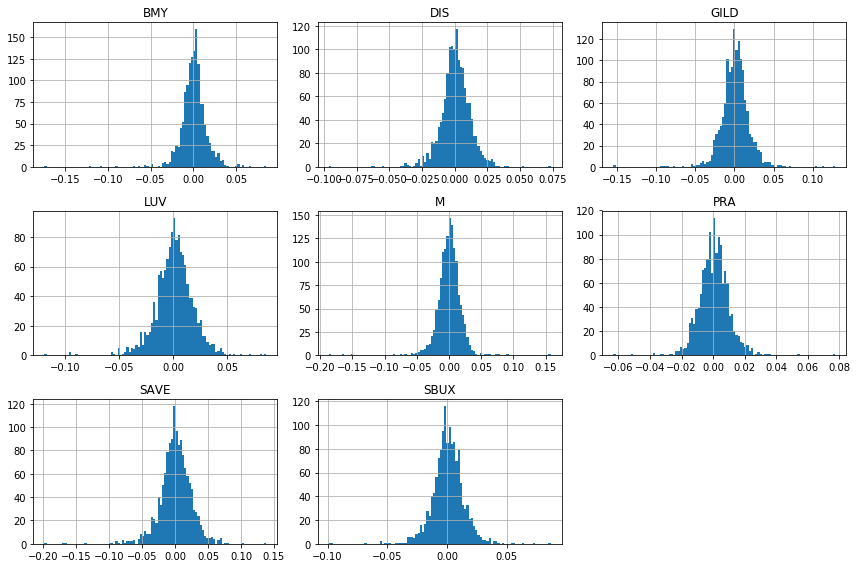

In [9]:
log_ret.hist(bins=100,figsize=(12,8));
plt.tight_layout();

In [10]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum((log_ret.mean() * weights) * 252)
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252,weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [11]:
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * -1

In [14]:
def check_sum(weights):
    # return 0 if the sum of the wieghts is 1
    return np.sum(weights) -1

In [21]:
cons = ({'type':'eq', 'fun':check_sum})

In [22]:
bounds = ((0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1))

In [24]:
init_guess = [0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125]

In [39]:
# minimize func from scipy
opt_results = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons)

In [40]:
opt_results

     fun: -1.4289999554285617
     jac: array([-0.17948788, -0.26897243,  0.69748753, -0.28735501, -0.07369843,
        0.13962597,  0.55994312, -0.32436459])
 message: 'Optimization terminated successfully.'
    nfev: 50
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([  1.40370127e-01,   0.00000000e+00,   2.67255836e-16,
         2.22098686e-01,   0.00000000e+00,   6.37531187e-01,
         0.00000000e+00,   0.00000000e+00])

In [42]:
get_ret_vol_sr(opt_results.x)

array([ 0.3       ,  0.20993703,  1.42899996])

In [30]:
# Efficient Frontier 
frontier_y = np.linspace(0,0.3,100) # see scatter bullet above: 0.3 is the max

In [31]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [32]:
frontier_volatility = []

for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},{'type':'eq', 'fun':lambda w: get_ret_vol_sr(w)[0]-possible_return})
    results = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds, constraints=cons)
    frontier_volatility.append(results['fun'])

In [33]:
np.random.seed(101)

num_portfolios = 25000
all_weights = np.zeros((num_portfolios, len(stocks.columns)))
return_array = np.zeros(num_portfolios)
volatility_array = np.zeros(num_portfolios)
sharpe_array = np.zeros(num_portfolios)

for index in range(num_portfolios):
    # Weights 
    weights = np.array(np.random.random(len(stocks.columns)))
    weights = weights/np.sum(weights)
    all_weights[index,:] = weights
    
    # Expeceted Return
    return_array[index] = np.sum((log_ret.mean() * weights) * 252) # 252 Business days in a year
    # Expected Volatility 
    volatility_array[index] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252,weights)))
    # Sharpe Ratio
    sharpe_array[index] = return_array[index]/volatility_array[index]

In [34]:
sharpe_array.max()

1.4705716737334347

In [35]:
sharpe_array.argmax()

19003

In [36]:
all_weights[sharpe_array.argmax(),:]

array([ 0.16240621,  0.13373363,  0.00455903,  0.17258027,  0.10183702,
        0.25896864,  0.00788195,  0.15803325])

In [37]:
max_sr_ret = return_array[sharpe_array.argmax()]
max_sr_vol = volatility_array[sharpe_array.argmax()]

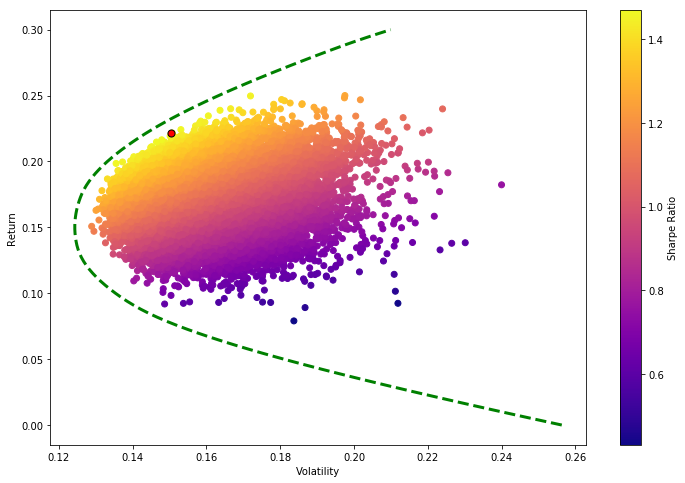

In [38]:
plt.figure(figsize=(12,8))
plt.scatter(volatility_array, return_array, c=sharpe_array, cmap='plasma')
plt.colorbar(label="Sharpe Ratio")
plt.xlabel('Volatility')
plt.ylabel('Return');
plt.scatter(max_sr_vol, max_sr_ret, c='red', s=50, edgecolor='black');
plt.plot(frontier_volatility,frontier_y,"g--",linewidth=3);

In [44]:
log_ret.cov()*252

,GILD,SBUX,M,DIS,BMY,LUV,SAVE,PRA
GILD,0.087102,0.016513,0.016355,0.016957,0.022023,0.021516,0.023359,0.008909
SBUX,0.016513,0.047386,0.018251,0.016611,0.012882,0.017369,0.022148,0.009437
M,0.016355,0.018251,0.092847,0.014981,0.010260,0.018580,0.024832,0.008720
DIS,0.016957,0.016611,0.014981,0.033187,0.013810,0.017762,0.018936,0.008404
BMY,0.022023,0.012882,0.010260,0.013810,0.057508,0.013349,0.016973,0.005973
LUV,0.021516,0.017369,0.018580,0.017762,0.013349,0.075734,0.056562,0.010353
SAVE,0.023359,0.022148,0.024832,0.018936,0.016973,0.056562,0.154857,0.011863
PRA,0.008909,0.009437,0.008720,0.008404,0.005973,0.010353,0.011863,0.023140


In [222]:
1/8

0.125